In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import reciprocal, uniform
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [4]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [5]:
df

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,100.00
2,C1,C1P1,A2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,12.00
3,C1,C1P1,A3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,10.00
4,C1,C1P1,B1,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00
5,C1,C1P2,A1,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,999.00
7,C1,C1P2,A3,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,500.00
8,C1,C1P2,B1,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,450.00
9,C1,C1P3,A1,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,120.00
11,C1,C1P3,A3,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,60.00
12,C1,C1P3,B1,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,300.00


In [6]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [7]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [8]:
X

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14
1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0
3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
4,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0
5,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1
7,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1
8,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1
9,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1
11,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1
12,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [10]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n"

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [12]:
y = df['Perda30']

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<br>
## SGDClassifier

In [15]:
C = 5
alpha = 1 / (C * len(X))

In [16]:
steps = [('scaler', StandardScaler()),(('sgd_clf',  SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=100000, random_state=42)))]
pipeline = Pipeline(steps)
scaler = StandardScaler()

In [17]:
random_scaled = pipeline.fit(X_train, y_train)

In [18]:
y_pred = pipeline.predict(X_test) 
accuracy_score(y_test, y_pred)

0.6779661016949152

In [19]:
#y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [20]:
# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

In [21]:
# roc_auc_score(y_test, y_pred_prob)

[[38  8]
 [11  2]]
Confusion matrix, without normalization


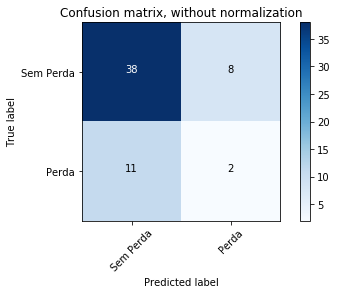

In [22]:
print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.83      0.80        46
          1       0.20      0.15      0.17        13

avg / total       0.65      0.68      0.66        59



<br>
## SVC

In [24]:
svm_clf = SVC(decision_function_shape="ovr")

In [25]:
#steps = [('scaler', StandardScaler()),(('svm_clf', SVC(decision_function_shape="ovr")))]
#pipeline = Pipeline(steps)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Fine-tunning the model.

In [26]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=100, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=2.554577930339617, gamma=0.010560533672768248 .................
[CV] .. C=2.554577930339617, gamma=0.010560533672768248, total=   0.0s
[CV] C=2.554577930339617, gamma=0.010560533672768248 .................
[CV] .. C=2.554577930339617, gamma=0.010560533672768248, total=   0.0s
[CV] C=2.554577930339617, gamma=0.010560533672768248 .................
[CV] .. C=2.554577930339617, gamma=0.010560533672768248, total=   0.0s
[CV] C=1.8089234034306114, gamma=0.009719984653885554 ................
[CV] . C=1.8089234034306114, gamma=0.009719984653885554, total=   0.0s
[CV] C=1.8089234034306114, gamma=0.009719984653885554 ................
[CV] . C=1.8089234034306114, gamma=0.009719984653885554, total=   0.0s
[CV] C=1.8089234034306114, gamma=0.009719984653885554 ................
[CV] . C=1.8089234034306114, gamma=0.009719984653885554, total=   0.0s
[CV] C=5.479445123150222, gamma=0.05839120081767312 ..................
[CV] ... C=5.4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=8.676157389269676, gamma=0.09436968120305222 ..................
[CV] ... C=8.676157389269676, gamma=0.09436968120305222, total=   0.0s
[CV] C=8.676157389269676, gamma=0.09436968120305222 ..................
[CV] ... C=8.676157389269676, gamma=0.09436968120305222, total=   0.0s
[CV] C=8.676157389269676, gamma=0.09436968120305222 ..................
[CV] ... C=8.676157389269676, gamma=0.09436968120305222, total=   0.0s
[CV] C=2.6525384313372307, gamma=0.027940597912243924 ................
[CV] . C=2.6525384313372307, gamma=0.027940597912243924, total=   0.0s
[CV] C=2.6525384313372307, gamma=0.027940597912243924 ................
[CV] . C=2.6525384313372307, gamma=0.027940597912243924, total=   0.0s
[CV] C=2.6525384313372307, gamma=0.027940597912243924 ................
[CV] . C=2.6525384313372307, gamma=0.027940597912243924, total=   0.0s
[CV] C=6.1768403646851056, gamma=0.03807478295796522 .................
[CV] .. C=6.1768403646851056, gamma=0.03807478295796522, total=   0.0s
[CV] 

[CV] C=8.540360654278382, gamma=0.027914885659784668 .................
[CV] .. C=8.540360654278382, gamma=0.027914885659784668, total=   0.0s
[CV] C=5.025103750823273, gamma=0.006155554697408402 .................
[CV] .. C=5.025103750823273, gamma=0.006155554697408402, total=   0.0s
[CV] C=5.025103750823273, gamma=0.006155554697408402 .................
[CV] .. C=5.025103750823273, gamma=0.006155554697408402, total=   0.0s
[CV] C=5.025103750823273, gamma=0.006155554697408402 .................
[CV] .. C=5.025103750823273, gamma=0.006155554697408402, total=   0.0s
[CV] C=8.292446982985588, gamma=0.020943801959303347 .................
[CV] .. C=8.292446982985588, gamma=0.020943801959303347, total=   0.0s
[CV] C=8.292446982985588, gamma=0.020943801959303347 .................
[CV] .. C=8.292446982985588, gamma=0.020943801959303347, total=   0.0s
[CV] C=8.292446982985588, gamma=0.020943801959303347 .................
[CV] .. C=8.292446982985588, gamma=0.020943801959303347, total=   0.0s
[CV] C

[CV] C=5.65211164137976, gamma=0.06719240840736879 ...................
[CV] .... C=5.65211164137976, gamma=0.06719240840736879, total=   0.0s
[CV] C=5.65211164137976, gamma=0.06719240840736879 ...................
[CV] .... C=5.65211164137976, gamma=0.06719240840736879, total=   0.0s
[CV] C=7.8583979053071, gamma=0.04271238173254672 ....................
[CV] ..... C=7.8583979053071, gamma=0.04271238173254672, total=   0.0s
[CV] C=7.8583979053071, gamma=0.04271238173254672 ....................
[CV] ..... C=7.8583979053071, gamma=0.04271238173254672, total=   0.0s
[CV] C=7.8583979053071, gamma=0.04271238173254672 ....................
[CV] ..... C=7.8583979053071, gamma=0.04271238173254672, total=   0.0s
[CV] C=10.688656597833013, gamma=0.0779630389590604 ..................
[CV] ... C=10.688656597833013, gamma=0.0779630389590604, total=   0.0s
[CV] C=10.688656597833013, gamma=0.0779630389590604 ..................
[CV] ... C=10.688656597833013, gamma=0.0779630389590604, total=   0.0s
[CV] C

[CV] C=3.158208104816288, gamma=0.02896373299278943 ..................
[CV] ... C=3.158208104816288, gamma=0.02896373299278943, total=   0.0s
[CV] C=3.158208104816288, gamma=0.02896373299278943 ..................
[CV] ... C=3.158208104816288, gamma=0.02896373299278943, total=   0.0s
[CV] C=3.158208104816288, gamma=0.02896373299278943 ..................
[CV] ... C=3.158208104816288, gamma=0.02896373299278943, total=   0.0s
[CV] C=7.510925475242239, gamma=0.0031806271156124342 ................
[CV] . C=7.510925475242239, gamma=0.0031806271156124342, total=   0.0s
[CV] C=7.510925475242239, gamma=0.0031806271156124342 ................
[CV] . C=7.510925475242239, gamma=0.0031806271156124342, total=   0.0s
[CV] C=7.510925475242239, gamma=0.0031806271156124342 ................
[CV] . C=7.510925475242239, gamma=0.0031806271156124342, total=   0.0s
[CV] C=3.2724752105718204, gamma=0.0019515039217112545 ...............
[CV]  C=3.2724752105718204, gamma=0.0019515039217112545, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.0s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015EE16D42E8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015EE16D4EF0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [27]:
rnd_search_cv.best_estimator_

SVC(C=5.257006577728277, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025147735461391305,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
rnd_search_cv.best_score_

0.7777777777777778

In [29]:
param_grid = [
        #{'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
         {'kernel': ['poly','rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 
         'degree': [2, 3, 4, 5 ,6],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0],
         'probability' : [True]},
    ]
grid_search_cv = GridSearchCV(svm_clf, param_grid, verbose=3, n_jobs=-1)
grid_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['poly', 'rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'degree': [2, 3, 4, 5, 6], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0], 'probability': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [30]:
grid_search_cv.best_estimator_

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
grid_search_cv.best_score_

0.7863247863247863

In [32]:
final_model = grid_search_cv.best_estimator_

In [33]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, verbose=3, n_jobs=-1)
print(cv_scores)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s


[0.83 0.81 0.7  0.78 0.78]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


## Predicting the Classes in Trainning Set

In [34]:
y_pred = final_model.predict(X_train_scaled)

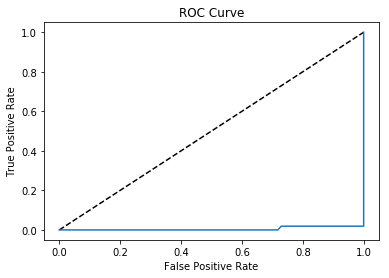

In [35]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [36]:
roc_auc_score(y_train, y_pred_prob)

0.005212133847597206

Confusion matrix, without normalization


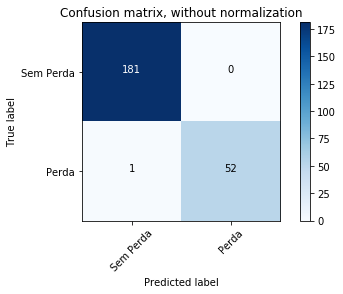

In [37]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

## Evaluating the model with Cross-Validation

In [39]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

In [42]:
y_scores = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [43]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


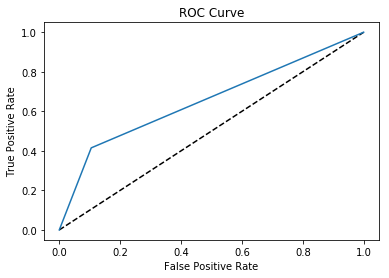

In [51]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [55]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_train

0.6550609819660168

Confusion matrix, without normalization


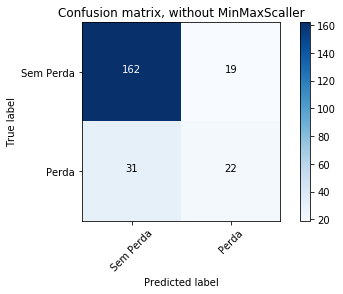

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without MinMaxScaller')

In [57]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87       181
          1       0.54      0.42      0.47        53

avg / total       0.77      0.79      0.78       234



## Precision/Recall Tradeoff

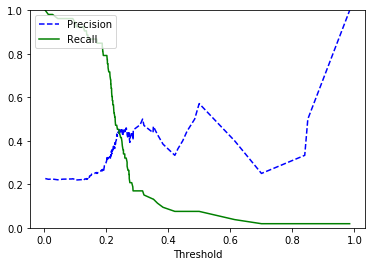

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [59]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.84 0.77 0.75]
0.7859735201507353


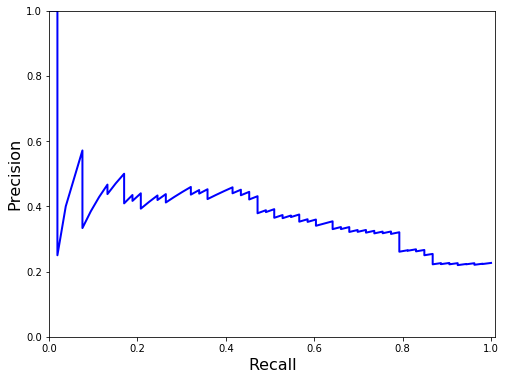

In [60]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## Predicting the Classes in Test Set

In [61]:
y_pred = final_model.predict(X_test_scaled)

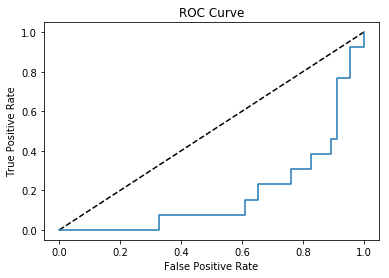

In [62]:
y_pred_prob = final_model.predict_proba(X_test_scaled)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [66]:
roc_auc_score(y_test, y_pred_prob)

0.18227424749163879

Confusion matrix, without normalization


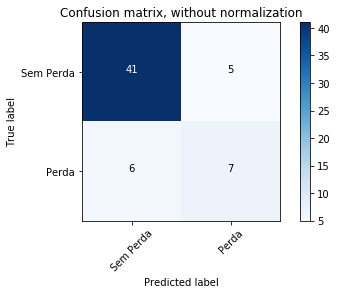

In [64]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

In [65]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88        46
          1       0.58      0.54      0.56        13

avg / total       0.81      0.81      0.81        59

